# LOFAR ionospheric scintillation data tutorial part 1
Maaijke Mevius, June 2023

We will inspect beamformed data of single stations pointing at one of the brightest radio sources in the Northern hemisphere.

The datasets we will use are [Dynspec_rebinned_L262603_SAP000.h5](https://filesender.surf.nl/download.php?token=da8a7b03-ad30-4e94-80cf-9255181240f6&files_ids=14358098), [LOFAR_20150302_170000_CS001LBA_LBA_OUTER_Cas-A.fits](https://spaceweather.astron.nl/SolarKSP/data/atdb_process/scintillation_preview/3155/262603/fits_files/LOFAR_20150302_170000_CS001LBA_LBA_OUTER_Cas-A.fits) and [LOFAR_20230503_100000_CS032LBA_LBA_OUTER_.fits](https://spaceweather.astron.nl/SolarKSP/data/atdb_process/scintillation_preview/4603/888136/fits_files/LOFAR_20230503_100000_CS032LBA_LBA_OUTER_.fits). Please download these to the `data/` subdirectory of the working directory of this notebook.

First some basic imports:

In [13]:
import matplotlib.pyplot as plt
import numpy as np

The data format we will work with is either hdf5 or fits. Fits files can easily be read using the astropy.io.fits package. For the hdf5 data we use h5py:

In [14]:
import h5py
from astropy.io import fits

The raw LOFAR beamformed data is generally stored in hdf5 format. Depending on how much averaging has happened before storing the data, these files can become very large. Let's start by inspecting one of the hdf5 files.  

In [15]:
myfile = h5py.File("data/Dynspec_rebinned_L262603_SAP000.h5")

An hdf5 file contains data arrays and metadata in a tree-like structure. `myfile` is pointing at the root of the file. You can access the branches below the root by checking the keys:

In [20]:
root_keys = myfile.keys()
print(root_keys)

<KeysViewHDF5 ['DYNSPEC_000', 'DYNSPEC_001', 'DYNSPEC_002', 'DYNSPEC_003', 'DYNSPEC_004', 'DYNSPEC_005', 'DYNSPEC_006', 'DYNSPEC_007', 'DYNSPEC_008', 'DYNSPEC_009', 'DYNSPEC_010', 'DYNSPEC_011', 'DYNSPEC_012', 'DYNSPEC_013', 'DYNSPEC_014', 'DYNSPEC_015', 'DYNSPEC_016', 'DYNSPEC_017', 'DYNSPEC_018', 'DYNSPEC_019', 'DYNSPEC_020', 'DYNSPEC_021', 'DYNSPEC_022', 'DYNSPEC_023', 'DYNSPEC_024', 'DYNSPEC_025', 'DYNSPEC_026', 'DYNSPEC_027', 'DYNSPEC_028', 'DYNSPEC_029', 'DYNSPEC_030', 'DYNSPEC_031', 'DYNSPEC_032', 'DYNSPEC_033', 'DYNSPEC_034', 'DYNSPEC_035', 'DYNSPEC_036', 'DYNSPEC_037', 'SYS_LOG']>


To plot the keys of any of the dynamic spectra:

In [29]:
for key in root_keys:
    print(myfile[key].keys())
    break

<KeysViewHDF5 ['COORDINATES', 'DATA', 'EVENT', 'PROCESS_HISTORY']>


The metadata can be accessed similarly via the `.attrs` attribute.

In [34]:
print(list(myfile.attrs))

['ANTENNA_SET', 'BF_FORMAT', 'BF_VERSION', 'CHANNELS_PER_SUBANDS', 'CHANNEL_WIDTH', 'CHANNEL_WIDTH_UNIT', 'CLOCK_FREQUENCY', 'CLOCK_FREQUENCY_UNIT', 'CREATE_OFFLINE_ONLINE', 'DOC_NAME', 'DOC_VERSION', 'DYNSPEC_GROUP', 'FILEDATE', 'FILENAME', 'FILETYPE', 'FILTER_SELECTION', 'GROUPETYPE', 'NOF_DYNSPEC', 'NOF_SAMPLES', 'NOF_TILED_DYNSPEC', 'NOTES', 'OBSERVATION_END_MJD', 'OBSERVATION_END_UTC', 'OBSERVATION_FREQUENCY_CENTER', 'OBSERVATION_FREQUENCY_MAX', 'OBSERVATION_FREQUENCY_MIN', 'OBSERVATION_FREQUENCY_UNIT', 'OBSERVATION_ID', 'OBSERVATION_NOF_BITS_PER_SAMPLE', 'OBSERVATION_NOF_STATIONS', 'OBSERVATION_START_MJD', 'OBSERVATION_START_UTC', 'OBSERVATION_STATIONS_LIST', 'PIPELINE_NAME', 'PIPELINE_VERSION', 'POINT_ALTITUDE', 'POINT_AZIMUTH', 'POINT_DEC', 'POINT_RA', 'PRIMARY_POINTING_DIAMETER', 'PROJECT_CONTACT', 'PROJECT_CO_I', 'PROJECT_ID', 'PROJECT_PI', 'PROJECT_TITLE', 'SAMPLING_RATE', 'SAMPLING_RATE_UNIT', 'SAMPLING_TIME', 'SAMPLING_TIME_UNIT', 'SUBBAND_WIDTH', 'SUBBAND_WIDTH_UNIT', 'SY

### Excercise

Try to familiarize yourself with the data format. What is the time resolution of the data? How many stations do we have data for? Can you get the frequency and time range of the data?

In [36]:
for mykey in myfile.attrs:
    print(mykey, myfile.attrs[mykey], sep="\t")

ANTENNA_SET	LBA_OUTER
BF_FORMAT	TAB
BF_VERSION	Cobalt/OutputProc 2.8 r30899 using DAL 2.5.0 and HDF5 1.8.4
CHANNELS_PER_SUBANDS	1
CHANNEL_WIDTH	0.1953125
CHANNEL_WIDTH_UNIT	Mhz
CLOCK_FREQUENCY	200.0
CLOCK_FREQUENCY_UNIT	Mhz
CREATE_OFFLINE_ONLINE	Offline
DOC_NAME	ICD 6:Dynamic-Spectrum Data
DOC_VERSION	ICD6:v-2.03.10
DYNSPEC_GROUP	1
FILEDATE	2015-03-02T16:28:51.7
FILENAME	L262603_SAP000.h5
FILETYPE	dynspec
FILTER_SELECTION	LBA_10_90
GROUPETYPE	Root
NOF_DYNSPEC	38
NOF_SAMPLES	57209
NOF_TILED_DYNSPEC	0
NOTES	
OBSERVATION_END_MJD	57083.68750764658
OBSERVATION_END_UTC	2015-03-02T17:59:59.579197407Z - 0 s
OBSERVATION_FREQUENCY_CENTER	44.622802734375
OBSERVATION_FREQUENCY_MAX	78.802490234375
OBSERVATION_FREQUENCY_MIN	10.443115234375
OBSERVATION_FREQUENCY_UNIT	Mhz
OBSERVATION_ID	262603
OBSERVATION_NOF_BITS_PER_SAMPLE	8
OBSERVATION_NOF_STATIONS	38
OBSERVATION_START_MJD	57083.6875
OBSERVATION_START_UTC	2015-03-02T16:30:00.000000000Z + 0 s
OBSERVATION_STATIONS_LIST	['CS001LBA' 'CS002LBA' 'CS003LB

In [43]:
from astropy.time import Time

In [44]:
freq_start = myfile.attrs["OBSERVATION_FREQUENCY_MIN"]
freq_end = myfile.attrs["OBSERVATION_FREQUENCY_MAX"]
time_start = Time(myfile.attrs["OBSERVATION_START_MJD"], format='mjd')
time_end = Time(myfile.attrs["OBSERVATION_END_MJD"], format='mjd')

In [45]:
for mykey in myfile["DYNSPEC_000"].attrs:
    print(mykey, myfile["DYNSPEC_000"].attrs[mykey], sep="\t")

BARYCENTER	0
BEAM_DIAMETER	0.0
BEAM_DIAMETER_DEC	0.0
BEAM_DIAMETER_RA	0.0
BEAM_FREQUENCY_CENTER	44.622800999999995
BEAM_FREQUENCY_MAX	78.704832
BEAM_FREQUENCY_MIN	10.54077
BEAM_FREQUENCY_UNIT	Mhz
BEAM_NOF_STATIONS	1.0
BEAM_STATIONS_LIST	['CS001LBA']
COMPLEX_VOLTAGE	0
DEDISPERSION	NONE
DISPERSION_MEASURE	0.0
DISPERSION_MEASURE_UNIT	
DYNSPEC_BANDWIDTH	68.359375
DYNSPEC_START_MJD	57083.7
DYNSPEC_START_UTC	2015-03-02T16:30:00.000000000Z + 0 s
DYNSPEC_STOP_MJD	57083.757083.7
DYNSPEC_STOP_UTC	2015-03-02T17:59:59.579197407Z - 0 s
GROUPETYPE	DYNSPEC
ONOFF	ON
POINT_DEC	58.81500000000001
POINT_RA	350.85
POSITION_OFFSET_DEC	0.0
POSITION_OFFSET_RA	0.0
SIGNAL_SUM	COHERENT
STOCKES_COMPONENT	['I']
TARGET	Cas A
TRACKING	J2000


### Excercise

The time frequency data can be accessed via the individual `DYNSPEC_###`. Each branch contains the data of a separate station. Find the shape of the data of the first station.

In [46]:
data = myfile["DYNSPEC_000"]["DATA"]

In [47]:
print(data.shape)

(57209, 350, 1)


The data size is 57209 timeslot x 350 frequency channels. Note that `data` is only a pointer to the data, it has not been read into memory yet. Although you might be able to read all of it into the memory of your computer, this is in general not the case, and you might want to read the data in parts before processing. You can treat the data pointer as if it was a numpy array. Let's try to make some images.

### Excercise

Make a time-frequency spectrum of every 10th time sample. **Hint:** Use `plt.imshow`, add axis labels by using the `extent` keyword. The frequency range can be found in the attrs. You can slice the data in numpy by using this syntax: `data[start:end:stepsize]`.

In [50]:
from matplotlib.dates import ConciseDateFormatter, date2num

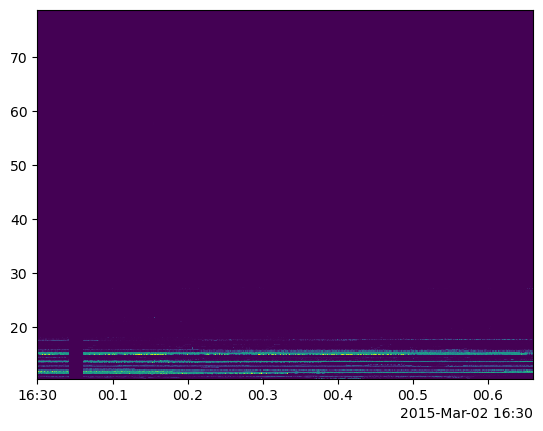

In [55]:
fig, ax = plt.subplots()
ax.imshow(
    data[::10, :, 0].T,
    origin="lower",
    interpolation="none",
    aspect="auto",
    extent=[date2num(time_start.datetime), date2num(time_end.datetime), freq_start, freq_end],
);
ax.xaxis_date();
ax.xaxis.set_major_formatter(ConciseDateFormatter(ax.xaxis.get_major_locator()))

Apart from the stripes at the bottom (what are those? )Not much to see in this one. Try using `np.log10()` on the data, to get a better dynamic range.

/var/folders/vt/78z_ygg10qjg519vzp0h8_qr0000gp/T/ipykernel_94271/922492067.py:3: RuntimeWarning: divide by zero encountered in log10
  np.log10(data[::10, :, 0].T),


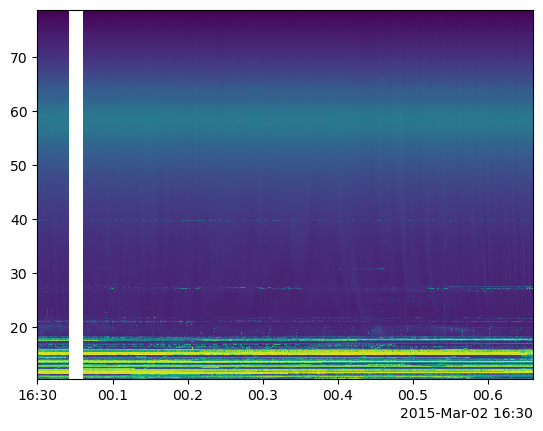

In [56]:
fig, ax = plt.subplots()
ax.imshow(
    np.log10(data[::10, :, 0].T),
    origin="lower",
    interpolation="none",
    aspect="auto",
    extent=[date2num(time_start.datetime), date2num(time_end.datetime), freq_start, freq_end],
);
ax.xaxis_date();
ax.xaxis.set_major_formatter(ConciseDateFormatter(ax.xaxis.get_major_locator()))

### Excercise: 

The bandpass is the frequency response of the telescope. Make a plot of the bandpass, use a logarithmic scale for the y-axis. **Hint:** use numpy `median` function on the time axis.

In [60]:
bandpass = np.median(data[::10, :, 0], axis=0)
freqs = np.linspace(freq_start, freq_end, bandpass.shape[0])

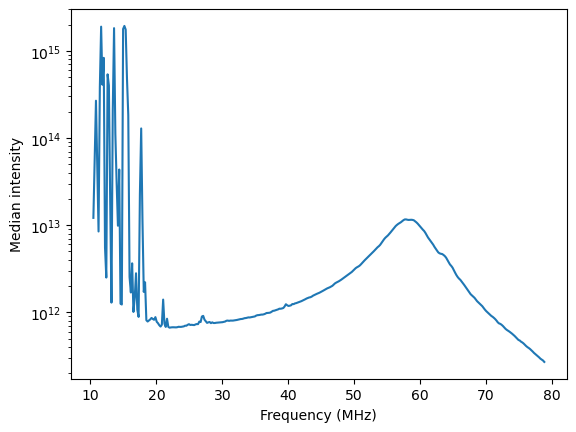

In [66]:
fig, ax = plt.subplots()
ax.plot(freqs, bandpass)
ax.set_yscale("log")
ax.set_xlabel("Frequency (MHz)")
ax.set_ylabel("Median intensity");

###

Apart from the strong RFI below 20 MHz, we can nicely recognize the LOFAR LBA dipole response, which has a resonance frequency around 58 MHz. We can now normalize the power spectrum by dividing or subtracting the bandpass.

### Excercise:

Make the time frequency power spectrum again but now normalized with the bandpass. Since the data (apart from the RFI) should now be close to 1 you can use the `vmin` and `vmax` parameters to select the interesting vertical scale (e.g. the 10% and 90% percintile of the data values).

Structures start to emerge. What do you see?  

In [79]:
normalized_data = data[::10, :, 0].T / bandpass[:, np.newaxis]

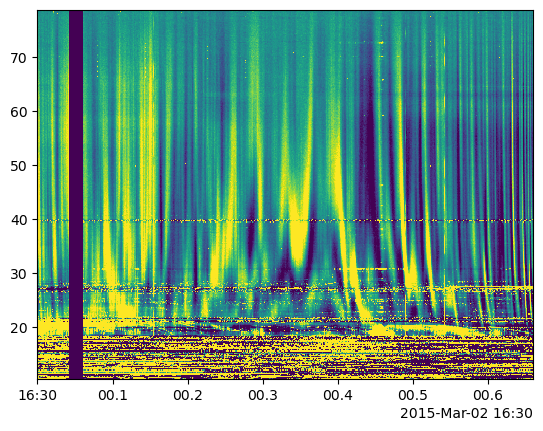

In [80]:
fig, ax = plt.subplots()
ax.imshow(
    normalized_data,
    origin="lower",
    interpolation="none",
    aspect="auto",
    extent=[date2num(time_start.datetime), date2num(time_end.datetime), freq_start, freq_end],
    vmin=0.9, vmax=1.1
);
ax.xaxis_date();
ax.xaxis.set_major_formatter(ConciseDateFormatter(ax.xaxis.get_major_locator()))

### Excercise:

Now make the same plot of a couple of stations. Do you notice something?

###

The scintillation index(S4) is defined as the normalised intensity variation: 
$S4^2 = {{<I^2> - <I>^2}\over{<I>^2}}$
Typically it is calculated over a window of 60s.
S4 gives a single number measure of the ionospheric conditions. 

### Excercise:

Calculate S4 over a window of 60s (~600 timeslots on the raw data) for all times. Either select a single frequency (without RFI) or use the median over a range of frequencies. Plot the result.

In [81]:
median_data = np.median(data[:, 150:350, 0], axis=1)
ntimes = median_data.shape[0]
rounded_ntimes = ntimes - ntimes % 600  # make sure the data shape can be divided by 600
median_data = np.reshape(median_data[0:rounded_ntimes], (-1, 600))
S4 = np.sqrt(np.var(median_data, axis=1) / np.average(median_data, axis=1)**2)

/var/folders/vt/78z_ygg10qjg519vzp0h8_qr0000gp/T/ipykernel_94271/1486224525.py:5: RuntimeWarning: invalid value encountered in true_divide
  S4 = np.sqrt(np.var(median_data, axis=1) / np.average(median_data, axis=1)**2)


In [82]:
median_data.shape

(95, 600)

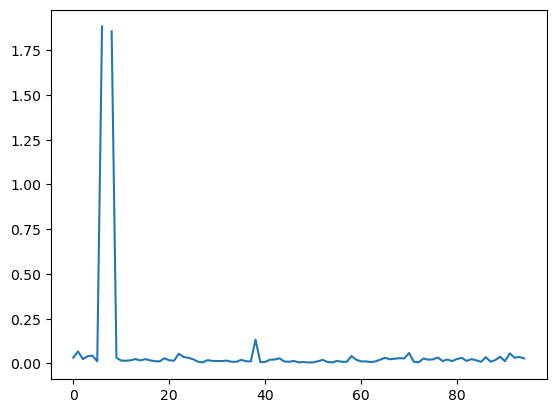

In [84]:
fig, ax = plt.subplots()
ax.plot(S4);